# Business Understanding


My company is expanding in to new industries to diversify its portfolio. Specifically, we are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. I must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# Data Understanding

In [389]:
# Need to import necessary libraries to read and work with the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


In [390]:
# Get a preliminary understanding of the data
df = pd.read_csv('AviationData.csv', encoding='latin-1', low_memory = False)
df.head()



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Lets try to understand the data in the set

After exploring the schema:

        1. There are 31 columns, 5 columns of data type float 64 and the rest are string. There are 88889 rows of data
        2. There are only 4 columns with no null values, There are 13 columns with over 10000 null values
        3. There are duplicate values in the following columns:
                
                a. Make
                b. Injury.Severity
                c. Engine Type
                d. Purpose of flight
                e. Weather Condition
                f. Purpose of flight
                
        4. The date column is currently in the string format, this needs to be changed
        

In [391]:
# What does the data structure look like
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [392]:
# 30 columns, 88889 rows, 5 columns of number data type and the rest are string

In [393]:
#Looks like there is some missing data as well. Lets Check for NA
df.isna().sum().sort_values()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Make                         63
Model                        92
Amateur.Built               102
Country                     226
Injury.Severity            1000
Registration.Number        1317
Aircraft.damage            3194
Weather.Condition          4492
Total.Uninjured            5912
Number.of.Engines          6084
Purpose.of.flight          6192
Report.Status              6381
Engine.Type                7077
Total.Fatal.Injuries      11401
Total.Minor.Injuries      11933
Total.Serious.Injuries    12510
Publication.Date          13771
Broad.phase.of.flight     27165
Airport.Name              36099
Airport.Code              38640
Latitude                  54507
Longitude                 54516
Aircraft.Category         56602
FAR.Description           56866
Air.carrier               72241
Schedule                  76307
dtype: i

In [394]:
# There are quite a few columns with more than 30000 missing values - thats more than 30% of the data

In [395]:
# I cant see all the columns so I am splitting the data

In [396]:
df.iloc[list(range(0,5)),list(range(0,10))]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN


In [397]:
df.iloc[list(range(0,5)),list(range(10,31))]

,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [398]:
#What does the data look like in each column?


In [399]:
df['Make'].value_counts()

Cessna                  22227
Piper                   12029
CESSNA                   4922
Beech                    4330
PIPER                    2841
                        ...  
BRYAN S HAPPELL             1
DANIELS                     1
Auseth                      1
Lansdorf                    1
Robinson Helicopters        1
Name: Make, Length: 8237, dtype: int64

In [400]:
# Looks like there are duplicate values here that need to be consolidated together


In [401]:
df['Model'].value_counts()

152          2367
172          1756
172N         1164
PA-28-140     932
150           829
             ... 
BANDIT 1        1
VAN/RV8A        1
AC-5m           1
Pa-28           1
D11S            1
Name: Model, Length: 12318, dtype: int64

In [402]:
df['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [403]:
df['Investigation.Type'].value_counts()

Accident    85015
Incident     3874
Name: Investigation.Type, dtype: int64

In [404]:
df['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(111)        1
Fatal(143)        1
Fatal(57)         1
Fatal(117)        1
Fatal(80)         1
Name: Injury.Severity, Length: 109, dtype: int64

In [405]:
# Looks like we need to remove the numbers from the Fatal injuries as we already have a column with number of fatalities

In [406]:
df['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [407]:
df['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

In [408]:
# Probably have to group all the Turbo together into one category. Same applies to none and unknown

In [409]:
df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [410]:
#Looks like we have to group together the categories here as well. For example Public Aircraft and Air race and show

In [411]:
df['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [412]:
#Looks like there is a data duplication issue above. Need to group the Unknowns together

In [413]:
df['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [414]:
df['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                                                                                                                                                                                                                            61754
Foreign                                                                                                                                                                                                                                                                                                                                                                                                                                    1999
<br /><br />                                                                                                                            

In [415]:
df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [416]:
df['FAR.Description'].value_counts()

091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
125                                   5
Part 125: 20+ Pax,6000+ lbs           5
107                                   4


In [417]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Data Preparation

Here is a brief summary of this section:
    
    1. I am removing 7 columns with over 30000 null values in each column as this is over 30% of the data points. Some columns had well over 50% null values. These columns did not add to understanding the safety of the airplanes either so, i removed them. Therefore this does not reduce quality of dataset 
    2. I am removing rows with null values. Any column that has 1000 rows or less with null values I removed those rows. Overall this came to ~1500 rows, so this did not reduce quality of data 
    3. In the Make column, makes are repeated because of the same name written in different cases and with additional information. I have fixed this by making all the cases uniform. I also applied a formula such that, for example, the make "Cessna", there were multiple instances where there would be a "Cessna ABC" and "Cessna XYZ". In such cases, I combined them into one make "Cessna" 
    4. The weather conditions column had the same issue as in the make column and this was fixed in the same way as above.
    5. Date column was converted from string to date format
    6. Injury Severity column had an issue where "Fatal" was repeating over again. This was fixed in the same way as above. 

In [418]:
# Handle the missing values

# Drop any column with over 30,000 missing values. AS that is over 30% of data points


df.drop('Latitude', axis = 1, inplace = True)
df.drop('Longitude', axis = 1, inplace = True)
df.drop('Airport.Name', axis = 1, inplace = True)
df.drop('Airport.Code', axis = 1, inplace = True)
df.drop('Aircraft.Category', axis = 1, inplace = True)
df.drop('FAR.Description', axis = 1, inplace = True)
df.drop('Air.carrier', axis = 1, inplace = True)
df.drop('Schedule', axis = 1, inplace = True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Registration.Number     87572 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82805 non-null  float64
 13  Engine.Type             81812 non-null  object 
 14  Purpose.of.flight       82697 non-null

In [419]:
df.isna().sum().sort_values()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Make                         63
Model                        92
Amateur.Built               102
Country                     226
Injury.Severity            1000
Registration.Number        1317
Aircraft.damage            3194
Weather.Condition          4492
Total.Uninjured            5912
Number.of.Engines          6084
Purpose.of.flight          6192
Report.Status              6381
Engine.Type                7077
Total.Fatal.Injuries      11401
Total.Minor.Injuries      11933
Total.Serious.Injuries    12510
Publication.Date          13771
Broad.phase.of.flight     27165
dtype: int64

In [460]:
# Remove rows with missing data if there is less than 1000 rows. 1000 rows are 1% of data - so it shouldnt affect the quality of the data

df = df[~df['Location'].isnull()]
df = df[~df['Model'].isnull()]
df = df[~df['Amateur.Built'].isnull()]
df = df[~df['Country'].isnull()]
df = df[~df['Injury.Severity'].isnull()]

df.isna().sum().sort_values()

#We have removed ~1500 rows - this shouldnt affect quality of data

In [421]:
# Fix the make column. Try to group together all the different names of the same brand into one name. First get everything into a uniform format
df['Make']= df['Make'].apply(lambda x: str(x).capitalize())

Makelist = ['Learjet','Dassault', 'Gulfstream','Cessna','Piper','Beech',
            'Boeing','Bell','Mooney','Robinson','Grumman','Mitsubishi','Sikorsky','Israel','Aerospatiale','Swearingen','Rockwell']

for make in Makelist:
    df['Make'] = df['Make'].apply(lambda x: make if str(make).upper() in str(x).upper() else x)


df['Make'].value_counts()


Cessna                     27215
Piper                      14946
Beech                       5462
Bell                        3893
Boeing                      2833
                           ...  
Tew william p                  1
Ruschke                        1
Craven's quickie               1
Universal moulded pdts.        1
Tolsma tony g                  1
Name: Make, Length: 7383, dtype: int64

In [422]:
# Fix Weather Conditions
df['Weather.Condition']= df['Weather.Condition'].apply(lambda x: str(x).upper())
df['Weather.Condition'].value_counts()


VMC    77303
IMC     5976
NAN     4492
UNK     1118
Name: Weather.Condition, dtype: int64

In [423]:
#Fix Purpose of Flight
#df[df.loc[:,'Purpose.of.flight'] =='Air Race/show']


df['Purpose.of.flight'] = df['Purpose.of.flight'].apply(lambda x: 'Air Race show' if x == 'Air Race/show' else x)
df['Purpose.of.flight'] = df['Purpose.of.flight'].apply(lambda x: 'Public Aircraft' if (x == 'Public Aircraft - Federal') else x)
df['Purpose.of.flight'] = df['Purpose.of.flight'].apply(lambda x: 'Public Aircraft' if (x == 'Public Aircraft - Local') else x)
df['Purpose.of.flight'] = df['Purpose.of.flight'].apply(lambda x: 'Public Aircraft' if (x == 'Public Aircraft - State') else x)

df['Purpose.of.flight'].value_counts()

Personal               49448
Instructional          10601
Unknown                 6802
Aerial Application      4712
Business                4018
Positioning             1646
Other Work Use          1264
Public Aircraft          963
Ferry                    812
Aerial Observation       794
Executive/corporate      553
Flight Test              405
Skydiving                182
Air Race show            158
External Load            123
Banner Tow               101
Glider Tow                53
Firefighting              40
Air Drop                  11
ASHO                       6
PUBS                       4
PUBL                       1
Name: Purpose.of.flight, dtype: int64

In [424]:
# Date is in string format - it needs to be converted into date format
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Injury.Severity         87889 non-null  object        
 7   Aircraft.damage         85695 non-null  object        
 8   Registration.Number     87572 non-null  object        
 9   Make                    88889 non-null  object        
 10  Model                   88797 non-null  object        
 11  Amateur.Built           88787 non-null  object        
 12  Number.of.Engines       82805 non-null  float6

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [425]:
# Create a Year Column
df['Year'] = df['Event.Date'].dt.year


In [426]:
# Need to fix Injury.Severity Column. Group all the 'Fatal' together 
df['Injury.Severity'] = df['Injury.Severity'].apply(lambda x: 'Fatal' if str(x)[0]=='F' else x)
df['Injury.Severity'].value_counts()

Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury.Severity, dtype: int64

# Exploratory Data Analysis

Through the process of data analysis I explored:
        
        a. The number of Fatalities by Purpose of travel, type of engine, weather conditions, phase of flight 
        b. The historical trend of number of fatalities injuries each year
        c. The Under/Over representation of Makes to the Total Fatalities
 
Based on the analysis above, I have reached conclusions and recommendations which have been mentioned below after the data analysis section

In [427]:
#Total Fatal Injuries by Make
x = df['Make'].value_counts(normalize=True)
x[x>0.01]

Cessna      0.306168
Piper       0.168142
Beech       0.061447
Bell        0.043796
Boeing      0.031871
Robinson    0.019024
Grumman     0.018529
Mooney      0.015581
Hughes      0.010485
Name: Make, dtype: float64

<AxesSubplot:title={'center':'Total Fatalities by Purpose of travel'}, xlabel='Purpose of flight', ylabel='Total Fatalities'>

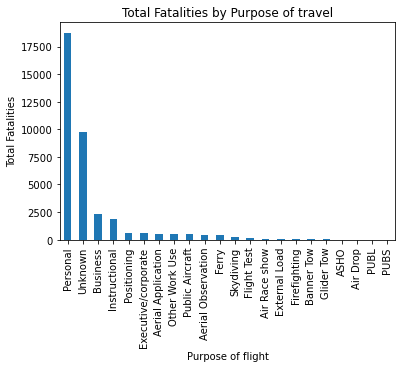

In [428]:
#Fatal Injuries by Purpose of travel
df.groupby('Purpose.of.flight')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).plot(kind='bar', xlabel = 'Purpose of flight', ylabel = 'Total Fatalities', title = "Total Fatalities by Purpose of travel")
                                                                         

<AxesSubplot:title={'center':'Total Fatalities by Engine Type'}, xlabel='Engine Type', ylabel='Total Fatalities'>

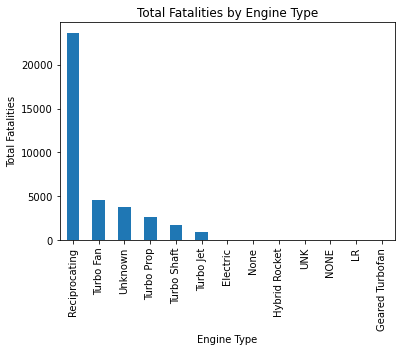

In [429]:
#Total Fatal Injuries by Engine Type
df.groupby('Engine.Type')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).plot(kind='bar', xlabel = 'Engine Type', ylabel = 'Total Fatalities', title = 'Total Fatalities by Engine Type')

In [430]:
#Total Fatal Injuries by Make
#df.groupby(['Make'])['Injury.Severity']values(ascending=False)

In [431]:
# I am more interested in accidents for corporate/executive purpose flights. I want to capture 80% of the data as there are a lot
# of makes that arent very significant
execdf = df[df['Purpose.of.flight']=='Executive/corporate']
x = execdf['Make'].value_counts(normalize=True)
x[x>0.01]





Cessna          0.278481
Beech           0.141049
Piper           0.119349
Bell            0.065099
Learjet         0.039783
Dassault        0.034358
Gulfstream      0.030741
Mitsubishi      0.028933
Sikorsky        0.027125
Israel          0.019892
Aerospatiale    0.018083
Swearingen      0.016275
Rockwell        0.016275
Name: Make, dtype: float64

In [432]:
execmakelist = ['Learjet','Dassault', 'Gulfstream','Cessna','Piper','Beech',
            'Bell','Mitsubishi','Sikorsky','Israel','Aerospatiale','Swearingen','Rockwell']

<AxesSubplot:title={'center':'Total Fatalities by Make - Executive Travel'}, xlabel='Make', ylabel='Total Fatalities'>

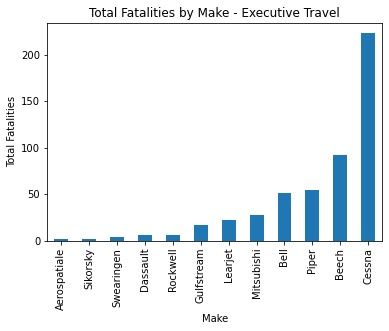

In [433]:
#So I am going to create a subset of data that has only those makes above
execdf1 = execdf[(execdf['Make']=='Cessna')|(execdf['Make']=='Beech')]
execdf2 = execdf[(execdf['Make']=='Piper')|(execdf['Make']=='Bell')]
execdf3 = execdf[(execdf['Make']=='Learjet')|(execdf['Make']=='Gulfstream')]
execdf4 = execdf[(execdf['Make']=='Dassault')|(execdf['Make']=='Mitsubishi')]
execdf5 = execdf[(execdf['Make']=='Sikorsky')|(execdf['Make']=='Aerospatiale')]
execdf6 = execdf[(execdf['Make']=='Swearingen')|(execdf['Make']=='Israel aircraft industries')]
execdf7 = execdf[(execdf['Make']=='Rockwell')]

execdfc = pd.concat([execdf1,execdf2,execdf3,execdf4,execdf5,execdf6,execdf7])
execdfc.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=True).plot(kind='bar', xlabel = "Make", ylabel = "Total Fatalities", title = 'Total Fatalities by Make - Executive Travel')

In [434]:
# Proportion of Make among Executive Travel
execdfc['Make'].value_counts(normalize=True).sort_values(ascending=False)

Cessna          0.341463
Beech           0.172949
Piper           0.146341
Bell            0.079823
Learjet         0.048780
Dassault        0.042129
Gulfstream      0.037694
Mitsubishi      0.035477
Sikorsky        0.033259
Aerospatiale    0.022173
Swearingen      0.019956
Rockwell        0.019956
Name: Make, dtype: float64

In [435]:
#Total Fatal Injuries by Make. I am checking for over/under representation of figures. 
execdfc.groupby('Make')['Total.Fatal.Injuries'].sum().apply(lambda x: x/execdfc['Total.Fatal.Injuries'].sum()).sort_values(ascending=False)

Make
Cessna          0.439842
Beech           0.181460
Piper           0.106509
Bell            0.100592
Mitsubishi      0.055227
Learjet         0.043393
Gulfstream      0.033531
Rockwell        0.011834
Dassault        0.011834
Swearingen      0.007890
Sikorsky        0.003945
Aerospatiale    0.003945
Name: Total.Fatal.Injuries, dtype: float64

In [436]:
# Looks like Cessna and Beech are over-represented in the Total Fatal Injuries. Cessna represents 34% of the accidents but accounts for 45% of the total Fatalities

<ipython-input-437-feb9cccba9b9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Weather.Condition')['Total.Uninjured','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Serious.Injuries'].sum().plot(kind='bar', xlabel = "Weather Condition", title = 'Incidents by Weather Condition')


<AxesSubplot:title={'center':'Incidents by Weather Condition'}, xlabel='Weather Condition'>

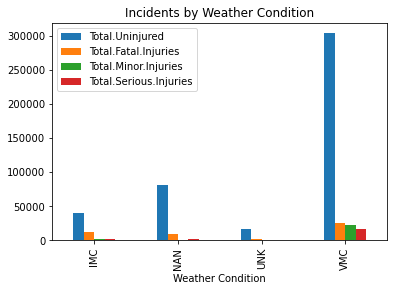

In [437]:
# Check Fatalities by Weather Condition
df.groupby('Weather.Condition')['Total.Uninjured','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Serious.Injuries'].sum().plot(kind='bar', xlabel = "Weather Condition", title = 'Incidents by Weather Condition')

<ipython-input-438-aa14af72a888>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  execdfc.groupby('Weather.Condition')['Total.Uninjured','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Serious.Injuries'].sum().plot(kind='bar', title = 'Incidents by Weather Condition - Executive Travel only')


<AxesSubplot:title={'center':'Incidents by Weather Condition - Executive Travel only'}, xlabel='Weather.Condition'>

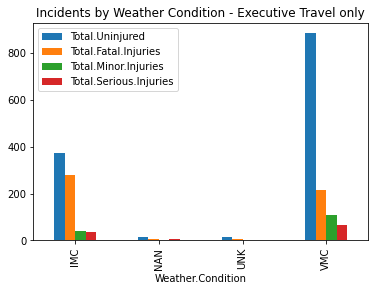

In [438]:
#Check Fatalities by Weather COndition - Executive Travel
execdfc.groupby('Weather.Condition')['Total.Uninjured','Total.Fatal.Injuries','Total.Minor.Injuries','Total.Serious.Injuries'].sum().plot(kind='bar', title = 'Incidents by Weather Condition - Executive Travel only')

In [439]:
# Looks like there are far more uninjured passengers in VMC conditions than IMC for both the general dataset and the executive dataset

<AxesSubplot:title={'center':'Total Fatalities by Engine Type - Executive Travel only'}, xlabel='Engine Type', ylabel='Total Fatalities'>

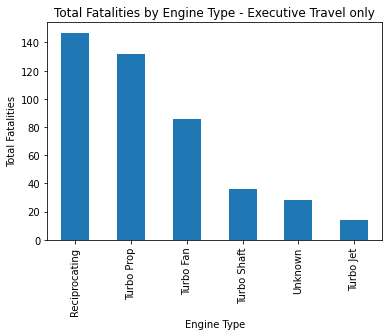

In [440]:
#Checking Engine type and Fatalities - Executive Travel
execdf.groupby('Engine.Type')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).plot(kind='bar', xlabel = "Engine Type", ylabel = "Total Fatalities", title = 'Total Fatalities by Engine Type - Executive Travel only')

<AxesSubplot:title={'center':'Total Fatalities by Engine Type'}, xlabel='Engine Type', ylabel='Total Fatalities'>

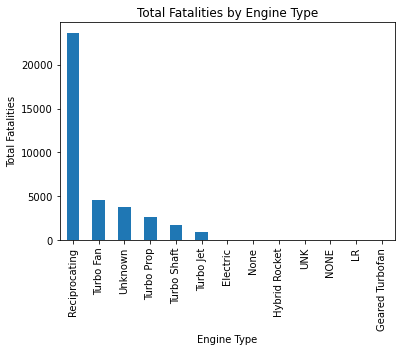

In [441]:
#Checking Fatalities by Engine Type (all dataset)
df.groupby('Engine.Type')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).plot(kind='bar', xlabel= "Engine Type", ylabel = "Total Fatalities", title = "Total Fatalities by Engine Type")

<AxesSubplot:title={'center':'Total Fatalities by Phase of Flight'}, xlabel='Phase of Flight', ylabel='Total Fatalities'>

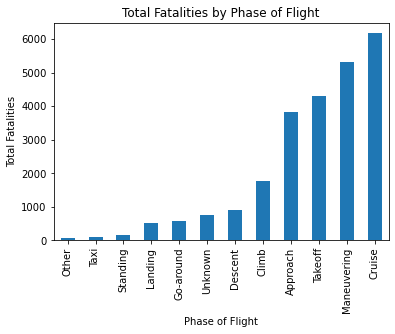

In [442]:
#Checking Fatalities by phase of flight (all dataset)
df.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum().sort_values().plot(kind='bar', xlabel = "Phase of Flight", ylabel = "Total Fatalities", title = 'Total Fatalities by Phase of Flight')

<AxesSubplot:title={'center':'Total Fatalities by Phase of flight - Executive travel only'}, xlabel='Phase of Flight', ylabel='Total Fatalities'>

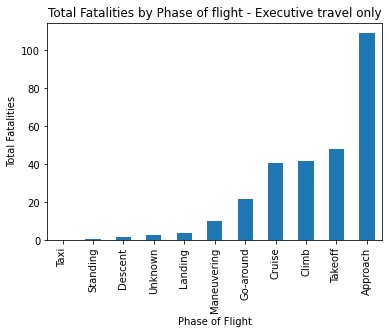

In [443]:
#Checking Fatalities by phase of flight - Executive Travel only
execdfc.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum().sort_values().plot(kind='bar', xlabel = "Phase of Flight", ylabel = "Total Fatalities", title = 'Total Fatalities by Phase of flight - Executive travel only')

<AxesSubplot:title={'center':'Total Fatalities by Year - Executive Travel only'}, xlabel='Year', ylabel='Total Fatalities'>

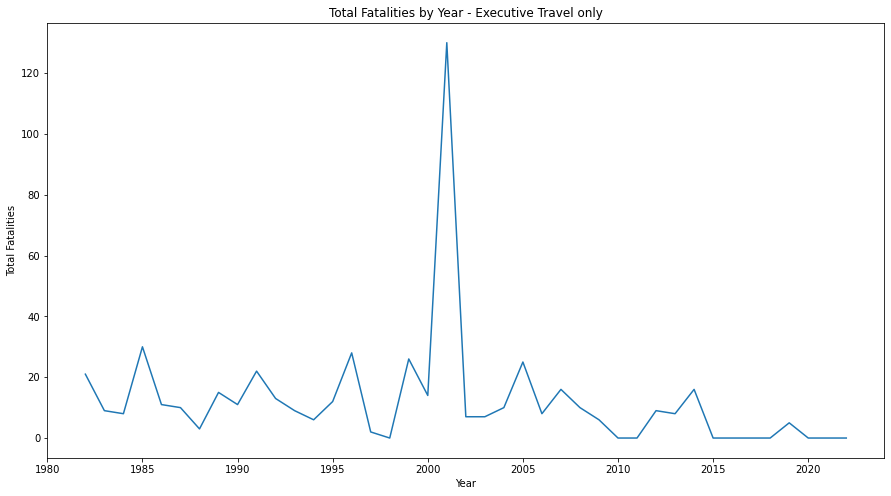

In [444]:
#Fatalities by Year - Executive travel only
execdfc.groupby(['Year'])['Total.Fatal.Injuries'].sum().plot(kind='line', figsize =(15,8), ylabel = "Total Fatalities", title = 'Total Fatalities by Year - Executive Travel only')

<AxesSubplot:title={'center':'Total Fatalities by Year'}, xlabel='Year', ylabel='Total Fatalities'>

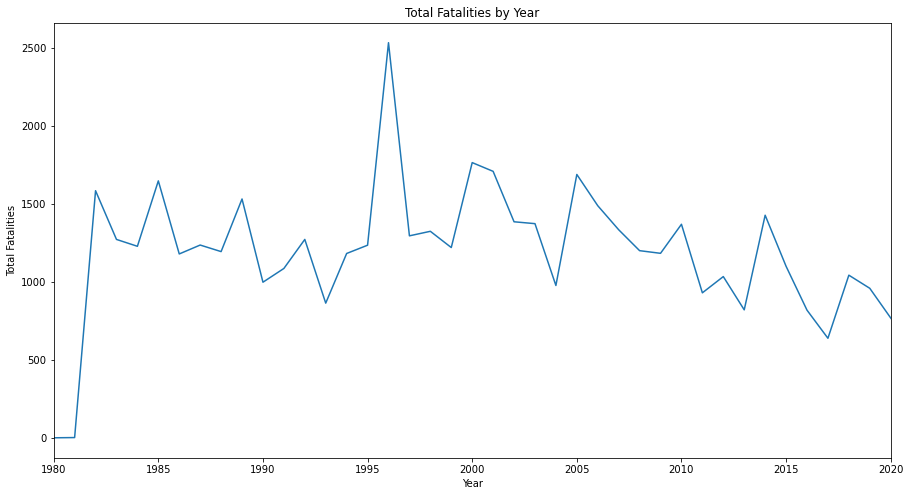

In [445]:
#Fatalities by Year - all dataset
df.groupby(['Year'])['Total.Fatal.Injuries'].sum().plot(kind='line', figsize =(15,8), ylabel = "Total Fatalities", xlim =[1980,2020], title = 'Total Fatalities by Year')

In [446]:
#Checking for any correlation between Engine number and Number of Injuries
execdfc.loc[:,['Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].corr()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,1.000000,0.048960,0.033755,-0.028133,0.120170
Total.Fatal.Injuries,0.048960,1.000000,0.038305,0.083758,-0.161531
Total.Serious.Injuries,0.033755,0.038305,1.000000,0.161302,-0.096320
Total.Minor.Injuries,-0.028133,0.083758,0.161302,1.000000,-0.093176
Total.Uninjured,0.120170,-0.161531,-0.096320,-0.093176,1.000000


In [447]:
##Checking for any correlation between Engine number and Number of Injuries
df.loc[:,['Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].corr()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Number.of.Engines,1.000000,0.098505,0.046157,0.098162,0.406058
Total.Fatal.Injuries,0.098505,1.000000,0.135724,0.073559,-0.015214
Total.Serious.Injuries,0.046157,0.135724,1.000000,0.326849,0.052869
Total.Minor.Injuries,0.098162,0.073559,0.326849,1.000000,0.147770
Total.Uninjured,0.406058,-0.015214,0.052869,0.147770,1.000000


<AxesSubplot:title={'center':'Executive Travel - Incident breakdown - Cessna'}, xlabel='Injury Severity', ylabel='Proportion of Total Incidents'>

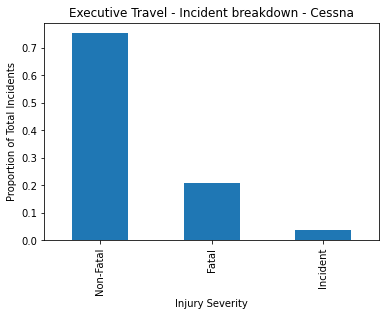

In [448]:
#Fatal vs Non-Fatal breakdown by Make. In this case Make is Cessna
execdfc[execdfc['Make']=='Cessna']['Injury.Severity'].value_counts(normalize=True).plot(kind='bar', xlabel = "Injury Severity", ylabel = 'Proportion of Total Incidents', title = 'Executive Travel - Incident breakdown - Cessna')

<AxesSubplot:title={'center':'Executive Travel - Incident Breakdown - Piper'}, xlabel='Injury Severity', ylabel='Proportion of Total Incidents'>

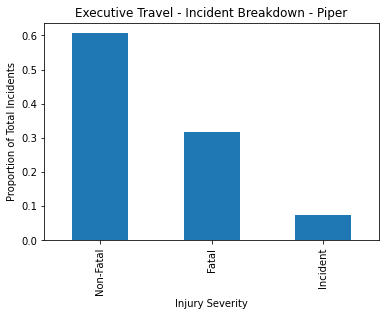

In [449]:
#Fatal vs Non-Fatal breakdown by Make. In this case Make is Piper
execdfc[execdfc['Make']=='Piper']['Injury.Severity'].value_counts(normalize=True).plot(kind='bar', xlabel = "Injury Severity", ylabel = 'Proportion of Total Incidents', title='Executive Travel - Incident Breakdown - Piper')

<AxesSubplot:title={'center':'Executive Travel - Incident Breakdown - Beech'}, xlabel='Injury Severity', ylabel='Proportion of Total Incidents'>

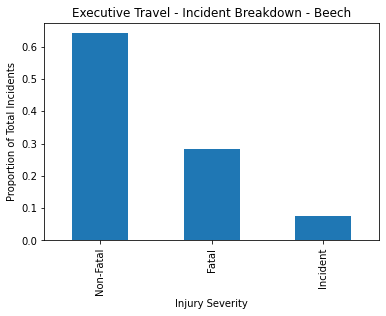

In [450]:
#Fatal vs Non-Fatal breakdown by Make. In this case Make is Beech
execdfc[execdfc['Make']=='Beech']['Injury.Severity'].value_counts(normalize=True).plot(kind='bar', xlabel = "Injury Severity", ylabel = 'Proportion of Total Incidents', title = "Executive Travel - Incident Breakdown - Beech")

<AxesSubplot:title={'center':'Executive Travel - Incident breakdown - Learjet'}, xlabel='Injury Severity', ylabel='Proportion of Total Incidents'>

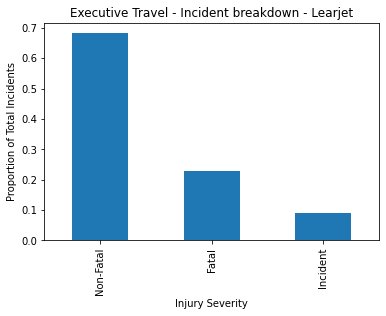

In [451]:
#Fatal vs Non-Fatal breakdown by Make. In this case Make is Learjet
execdfc[execdfc['Make']=='Learjet']['Injury.Severity'].value_counts(normalize=True).plot(kind='bar',
xlabel = "Injury Severity", ylabel = 'Proportion of Total Incidents', title = "Executive Travel - Incident breakdown - Learjet")

<AxesSubplot:title={'center':'Executive Travel - Incident Breakdown - Gulfstream'}, xlabel='Injury Severity', ylabel='Proportion of Total Incidents'>

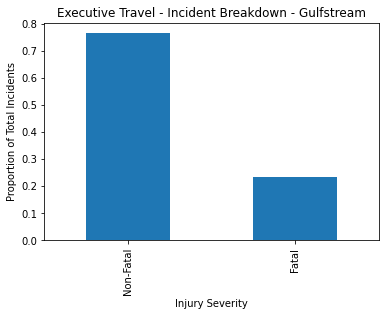

In [452]:
#Fatal vs Non-Fatal breakdown by Make. In this case Make is Gulfstream
execdfc[execdfc['Make']=='Gulfstream']['Injury.Severity'].value_counts(normalize=True).plot(kind='bar',
xlabel = "Injury Severity", ylabel = 'Proportion of Total Incidents', title="Executive Travel - Incident Breakdown - Gulfstream")

<AxesSubplot:title={'center':'Executive Travel - Incident Breakdown - Dassault'}, xlabel='Injury Severity', ylabel='Proportion of Total Incidents'>

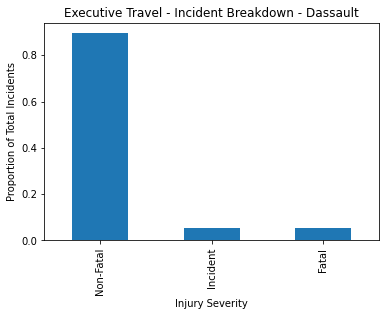

In [453]:
#Fatal vs Non-Fatal breakdown by Make. In this case Make is Dassault
execdfc[execdfc['Make']=='Dassault']['Injury.Severity'].value_counts(normalize=True).plot(kind='bar', xlabel = "Injury Severity",
ylabel = 'Proportion of Total Incidents', title = 'Executive Travel - Incident Breakdown - Dassault')

<AxesSubplot:title={'center':'Proportion of accidents during Instrument weather conditions - Executive Travel Only'}, xlabel='Injury Severity', ylabel='Proportion of Total Incidents'>

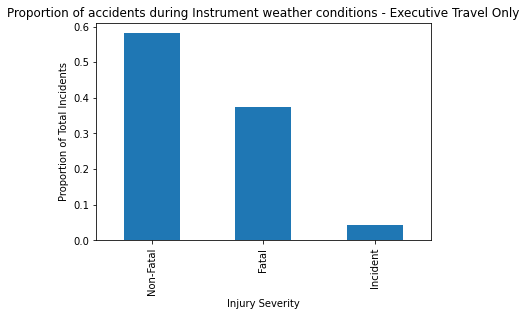

In [454]:
#Splitup of accidents by proportion under IMC conditions meaning there is ideal visual clarity. This considers only executive travel dataset
execdf[execdf['Weather.Condition']=='IMC']['Injury.Severity'].value_counts(normalize=True).plot(kind='bar',
xlabel = 'Injury Severity', ylabel = 'Proportion of Total Incidents', title ='Proportion of accidents during Instrument weather conditions - Executive Travel Only')

<AxesSubplot:title={'center':'Proportion of accidents during VMC Weather conditions - Executive travel only'}, xlabel='Injury Severity', ylabel='Proportion of Total Incidents'>

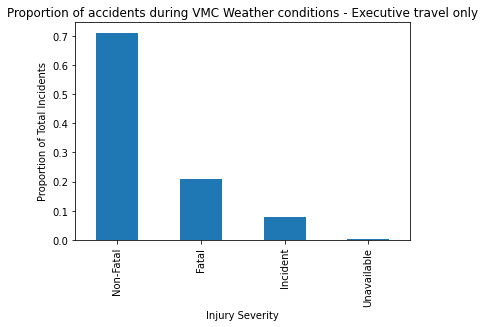

In [455]:
#Splitup of accidents by proportion under VMC conditions meaning there is ideal visual clarity. This considers only executive travel dataset
execdf[execdf['Weather.Condition']=='VMC']['Injury.Severity'].value_counts(normalize=True).plot(kind='bar',
xlabel = 'Injury Severity', ylabel = 'Proportion of Total Incidents', title = 'Proportion of accidents during VMC Weather conditions - Executive travel only' )

<AxesSubplot:title={'center':'Proportion of accidents during VMC weather conditions'}, xlabel='Injury Severity', ylabel='Proportion of Total Incidents'>

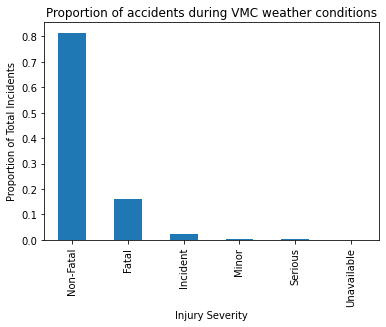

In [456]:
#Proportion of Fatal accidents under VMC conditions meaning there is ideal visual clarity. This considers entire dataset
df[df['Weather.Condition']=='VMC']['Injury.Severity'].value_counts(normalize=True).plot(kind='bar', xlabel = 'Injury Severity', ylabel = 'Proportion of Total Incidents',
title = 'Proportion of accidents during VMC weather conditions')

<AxesSubplot:title={'center':'Proportion of Fatal accidents during Instrument weather conditions'}, xlabel='Injury Severity', ylabel='Proportion of Total Incidents'>

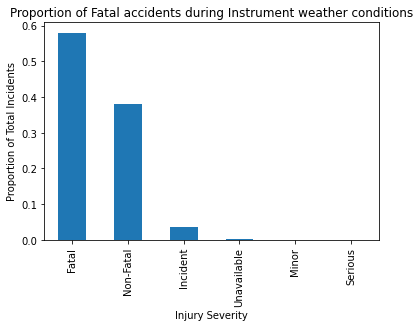

In [457]:
#Proportion of Fatal accidents during Instrument weather conditions - meaning weather conditions are poor.
df[df['Weather.Condition']=='IMC']['Injury.Severity'].value_counts(normalize=True).plot(kind='bar', xlabel = 'Injury Severity', ylabel = 'Proportion of Total Incidents', title = 'Proportion of Fatal accidents during Instrument weather conditions')

In [458]:
#import os
#os.makedirs('folder/subfolder', exist_ok=True)  
#Create new CSV to work on Tableau
df.to_csv('Aviationnew.csv')

In [459]:
execdf[(execdf['Make']=='Learjet')& (execdf['Engine.Type']=='Turbo Jet')]['Model']

3845     LR-25
6338       35A
7085       25D
37322      35A
46480       60
49949    LJ-60
56031      24B
72996       25
Name: Model, dtype: object

# Conclusions

1. More Fatal Accidents have happened during personal travel than any other purpose of travel
2. Weather plays a more important factor than the type of plane. Under poorer weather conditions with less visual clarity, nearly 80% of accidents are fatal accidents, whereas under better visual conditions, only ~20% of incidents are fatal
3. Although Fatal accidents have been occuring until very recently. Not many have happened recently in Executive or Corporate/Jet travel
4. Planes with Reciprocating engines are the ones with the highest number of fatalities, so it is best to avoid such planes. Turbojets have the lowest number of fatalities
5. According to the entire dataset, the most fatalities occured during the "Cruise" Phase of flight, however, the highest fatalities in executive/corporate travel occured during the "Approach" phase of the flight. Pilots flying corporate jets have to be particularly more careful when approaching


## Limitations

1. We are considering plane options from a perspective of safety. There are other factors to consider:
    
        a. Cost - What budget does the company have. Will the company have access to financing to purchase the plane
    
        b. Passenger Capacity: How many people would like to travel at a time?
    
        c. Flight Range: What kind of distances would the company look at traveling
    
    
 2. Even when looking at safety there are other factors to consider:
     
         a. Most fatal accidents have happened under poorer visual conditions. Perhaps rather than focusing on the type of             plane, it might be better to focus on the flying conditions and fly during better weather conditions
     
 
 3. When assessing safety from the point of view of Total Fatal Injuries, it can be misleading as we don't know the plane passenger capacity. For example, we see that Cessna planes have the highest proportion of fatal injuries. That could be a safety issue, or it could be they are bigger planes carrying more people so, when there is an accident it is likely to have more fatal injuries
    
    

## Recommendations

After looking at the data: Since our intended purpose of travel is Corporate travel, Learjets are underrepresented in terms of total fatal accidents. Meaning Learjets make up 3% of the total incident/accident but only represent 1% of the total fatalities. So among the Learjet I would recommend one with a Turbojet engine as those are the ones with the least number of incidents and fatalities, so to name one model it would be a Learjet LR -25. There are other Makes of planes with lower number of fatalities than Learjet but those numbers are too small to have any statistical significance.However, it is quite clear that weather plays a crucial role in the fatalities, so regarless of which plane is used, it is always advisable to assess weather and visual conditions before traveling

## Next Steps

We have researched planes from a safety perspective. Next we would need to look at the data from other angles as mentioned in the limitation section e.g. budget, passenger capacity flight range etc.